<center> 

### DATA 22100 - Introduction to Machine Learning 


<img src="https://github.com/david-biron/DATA221imgs/blob/main/UChicago_DSI.png?raw=true" width="300" height="350">

</center> 



<center> 

# Metrics For Evaluating Classification Models
    
</center> 

    

## The Confusion Matrix

### Confusion matrix for a binary classification model (reminder) 

A $2\times 2$ table summarizing the possible outcomes and predictions

<center>
<img src="https://github.com/david-biron/DATA221imgs/blob/main/ConfusionMatrix2x2.png?raw=true" width="300"> 
</center>

* **True Positive:** </br> 
Predicted positive (1) and the real outcome is positive (1).

* **True Negative:** </br> 
Predicted negative (0) and the real outcome is negative (0).


* **False Positive / Type 1 Error:** </br>
Predicted positive (1) and the real outcome is negative (0).

* **False Negative / Type 2 Error:** </br>
Predicted negative (0) and the real outcome is positive (1).





### Confusion Matrix with more classes 

The generalization of this idea to a classification problem with any number of classes is straightforward: 


<img src="https://github.com/david-biron/DATA221imgs/blob/main/ConfusionMatrixPics.png?raw=true" width="450">


#### Note:

* The numbers on the **diagonal** are **true predictions**. </br> 
  E.g., an airplane identified as an airplane.  

* The **off diagional** numbers are **false predictions**. </br>
  E.g., an airplane identified as a frog.  
  
* **Type I errors** are obtained from **summing the off-diagonal columns**. </br>
  E.g., Actual images of non-airplanes were erroneously identified as airplanes. </br> 
  Hence, the sum of the first column (without the diagonal element) is the number of 'False positive airplanes'. 

* **Type II errors** are obtained from **summing the off-diagonal rows**. </br>
  E.g., Actual images of airplanes were erroneously identified as non-airplanes. </br> 
  Hence, the sum of the first row (without the diagonal element) is the number of 'False negative airplanes'. 


#### Thus, each class has its own Type I error (FP) and Type II error (FN) rates.   


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50"> | A Naive Bayes classifier for penguin species: |




### The Palmer Station penguins dataset 


We will use the [Palmer Station penguins dataset can be found here](https://allisonhorst.github.io/palmerpenguins/).

<img src="https://github.com/david-biron/DATA221imgs/blob/main/culmen_depth.png?raw=true" width="300">


In [1]:
import pandas as pd 
import numpy as np 

penguins = pd.read_json("/Users/giovannimaya/Downloads/data/penguins.json")
penguins.head()

,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
#######################
# Rudimentary cleanup #
#######################

penguins = penguins[['Species', 'Beak Length (mm)', 'Beak Depth (mm)', 
                     'Flipper Length (mm)', 'Body Mass (g)']]
penguins = penguins.dropna()
penguins.head()

,Species,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


### (1) Note the units - they could matter 

Why? 

(although the GaussianNB implementation seems to take care of that). 

### (2) Where will a GausianNB classifier get $\mu$ and $\sigma$ for each species? 

...

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

predictors = penguins.columns[1:]
outcome = penguins.columns[0]

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(penguins[predictors], 
                     penguins[outcome], test_size=0.25) 

##############################################
# Initialize an instance of the model object #
##############################################
model = GaussianNB()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)

##########################
# Predict with the model #
##########################
y_hat = model.predict(X_test)

##################
# Test the model #
##################
print('First testing datapoint: \n', pd.DataFrame(X_test.iloc[0,:]).T)
print('Model prediction: ', y_hat[0], '\n')


First testing datapoint: 
      Beak Length (mm)  Beak Depth (mm)  Flipper Length (mm)  Body Mass (g)
165              52.0             18.1                201.0         4050.0
Model prediction:  Chinstrap 



### Calculating the confusion matrix with `sklearn.metrics`

In [5]:
from sklearn.metrics import confusion_matrix

# The confusion_matrix (numbers) 
cm = confusion_matrix(y_test, y_hat) # <--- Note the use of the 
                                     # TESTING data 
print(cm) 

# The labels for the confusion matrix 
# (in the same oreder as used by the model) 
labels = penguins['Species'].unique()
print(labels)



[[38  2  0]
 [ 2 15  0]
 [ 0  0 29]]
['Adelie' 'Chinstrap' 'Gentoo']


### [Visualizing](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) the confusion matrix with `sklearn.metrics`

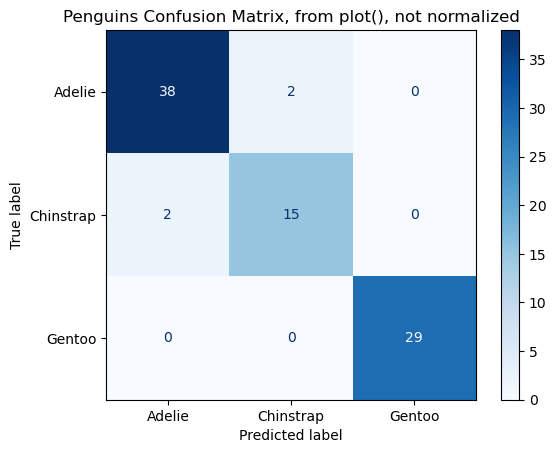

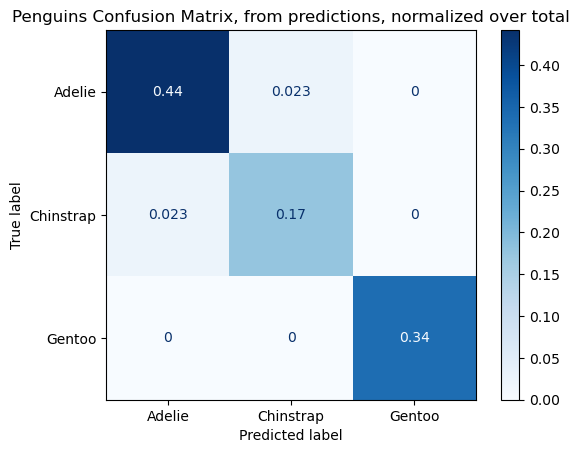

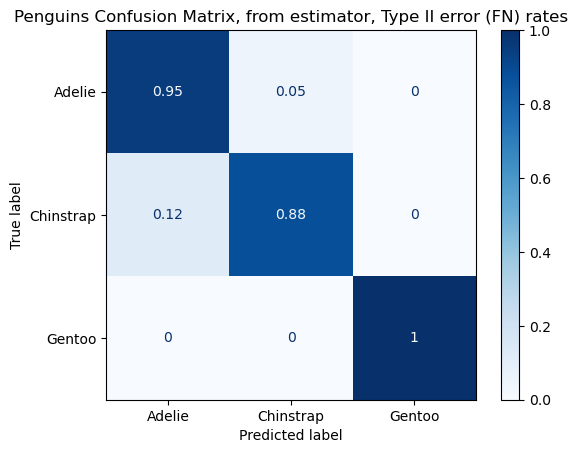

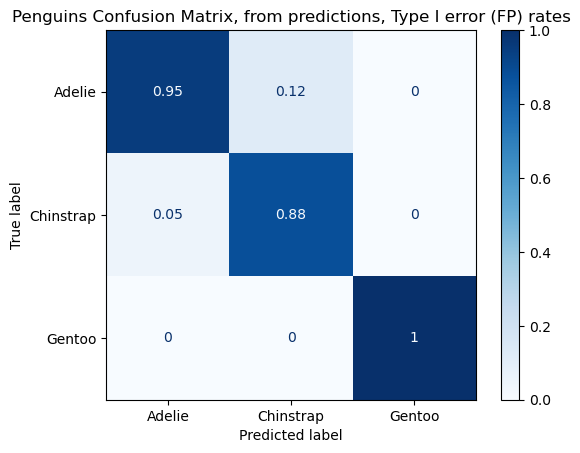

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

title0 = 'Penguins Confusion Matrix, from '

# Visualize the confusion matrix (i)
disp = ConfusionMatrixDisplay(cm, display_labels=labels).plot(
                                                  cmap=plt.cm.Blues)
disp.ax_.set_title(title0+'plot(), not normalized');

# Visualize the confusion matrix (ii)
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     display_labels=labels,
     cmap=plt.cm.Blues,
     normalize='all', # Normalized over the total number of samples 
    )
disp.ax_.set_title(title0+'predictions, normalized over total');

# Visualize the confusion matrix (iii)
disp = ConfusionMatrixDisplay.from_estimator(
     model,
     X_test, # run the model to get y_hat
     y_test,
     display_labels=labels,
     cmap=plt.cm.Blues,
     normalize='true', # Normalized over the true outcomes (rows)  
                       # Shows Type II error rates (FNs)
    )
disp.ax_.set_title(title0+'estimator, Type II error (FN) rates');

# Visualize the confusion matrix (iv)
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     display_labels=labels,
     cmap=plt.cm.Blues,
     normalize='pred', # Normalized over the predictions (columns)   
                       # Shows Type I error rates (FPs) 
    )
disp.ax_.set_title(title0+'predictions, Type I error (FP) rates');




#### `ConfusionMatrixDisplay` returns an  [sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)


In [7]:
type(disp)

sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay

## Numerical Evaluation Metrics

### Accuracy 

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **Accuracy** of a classifier is the ratio of the number of correctly predicted samples by the total number of samples. $$ Accuracy \equiv \frac{\text{No. of correct predictions}}{\text{Total no. of samples}} $$ |

 $$ \text{For a binary classifier: } \  Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$   
 
#### With more than two classes:  

* The accuracy score for the model will be the sum of the diagonal (trace) of the confusion matrix divided by the    sum of all its off-diagonal elements. 

* One could define the accuracy for a specific class (considering any entry not in the rwo and not in the column of the given class as a 'true negative'). However, with many classes there could typically be many TN's such that a high accuracy for a given class may well not be very informative.  

### Accuracy can be misleading (especially if the classes are imbalanced)

* Accuracy metric doesn't convey information about False Positive and False Negative, individually. 

* If, say, 'Gentoo' were $90\%$ of the labels in the dataset, **always** predicting 'Gentoo' would yield $Accuracy = 0.9$ </br> (since $TP = 0.9 \times total$ and $TN=0$). This is probably not the best classifier... 


In [8]:
import sklearn.metrics as skm

# Calculating the accuracy of the penguin species NB classifier
print("Accuracy of the penguin species NB classifier is: %.2f"%(skm.accuracy_score(y_test, y_hat)))

Accuracy of the penguin species NB classifier is: 0.95


### Precision 

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **precision** of a classifier is the ratio of true positive predictions and all positive predictions. $$ Precision \equiv \frac{\text{No. of correct positive predictions}}{\text{Total no. of positive predictions, true or false}} $$ <br/> precision $\sim$ the probability of a correct predictions **given** 'positive' prediction. |

 $$ \text{For a binary classifier: } \  Precision = \frac{TP}{TP+FP} $$   

<img src="https://github.com/david-biron/DATA221imgs/blob/main/PrecisionSchematic.png?raw=true" width="600">

#### With more than two classes:  

* A precision score can be calculated for each class (considering any off-diagonal entry on the same column as a 'false positive'). 

* An **average precision score** can be calculated for the model as a whole (more useful when the precisions for individual classes are 'balanced'). 


In [9]:
import sklearn.metrics as skm

str0 = 'of the penguin species NB classifier: '

# Calculating the precisions for each class of the penguin 
# species NB classifier
prc = skm.precision_score(y_test, y_hat, average=None)
print('Precisions'+str0+'%.2f, %.2f, and %.2f'%(prc[0],prc[1],prc[2]))

# Calculating the precision globally by counting the 
# total true positives and false positives.
prc = skm.precision_score(y_test, y_hat, average='micro')
print('Global precision '+str0+'%.2f'%prc)

# Calculating the precision for each label, and return their 
# unweighted mean. This does not take label imbalance into account.
prc = skm.precision_score(y_test, y_hat, average='macro')
print('Unweighted mean precision '+str0+'%.2f'%prc)

# Calculating the precision for each label, and return their 
# weighted mean. This takes label imbalance into account by 
# weighing each class precision by its support
# (the number of true instances for each label).
prc = skm.precision_score(y_test, y_hat, average='weighted')
print('Weighted mean of precisions '+str0+'%.2f'%prc)



Precisionsof the penguin species NB classifier: 0.95, 0.88, and 1.00
Global precision of the penguin species NB classifier: 0.95
Unweighted mean precision of the penguin species NB classifier: 0.94
Weighted mean of precisions of the penguin species NB classifier: 0.95


### Recall

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **recall** of a classifier is the ratio of true positive predictions and all actually positive outcomes. $$ Precision \equiv \frac{\text{No. of correct positive predictions}}{\text{Total no. of positive outcomes, regardless of predictions}} $$ <br/> Recall $\sim$ the probability of a correct prediction **given** an actually positive outscome.  |

 $$ \text{For a binary classifier: } \  Recall = \frac{TP}{TP+FN} $$   

<img src="https://github.com/david-biron/DATA221imgs/blob/main/RecallSchematic.png?raw=true" width="550">


#### With more than two classes:  

* A recall score can be calculated for each class (considering any off-diagonal entry on the same column as a 'false positive'). 

* An **average recall score** can be calculated for the model as a whole (more useful when the precisions for individual classes are 'balanced'). 


In [11]:
import sklearn.metrics as skm

str0 = 'of the penguin species NB classifier: '

# Calculating the recalls for each class of the penguin species NB classifier
rcl = skm.recall_score(y_test, y_hat, average=None)
print('Recalls '+str0+'%.2f, %.2f, and %.2f'%(rcl[0],rcl[1],rcl[2]))

# Calculating the recall globally by counting the total true positives and false negatives.
rcl = skm.recall_score(y_test, y_hat, average='micro')
print('Global recall '+str0+'%.2f'%rcl)

# Calculating the recall for each label, and return their weighted mean. 
# This takes label imbalance into account by weighing each class precision by its support
# (the number of true instances for each label).
rcl = skm.recall_score(y_test, y_hat, average='weighted')
print('Weighted mean of recalls '+str0+'%.2f'%rcl)



Recalls of the penguin species NB classifier: 0.97, 1.00, and 1.00
Global recall of the penguin species NB classifier: 0.99
Weighted mean of recalls of the penguin species NB classifier: 0.99


### Precision/recall trade-off 

Often, modeling choices (hyperparameter values, thresholds, etc.) would yiled classifications with either a high precision and lower recall **or** a high recall and lower precision. 

<img src="https://github.com/david-biron/DATA221imgs/blob/main/PrecisionRecallCurve.png?raw=true" width="400">

$$\boxed{\text{Increasing recall $\leftrightarrow$ decrease precision & vice versa.}}$$

### The desired balance depends on context 

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50" height=""> | A stringent spam filter may favor occasionally sending ham to the Spam folder rather than let spam through. | 
$\rightarrow$ | high precision is preferable (less FPs even at the expense of more FNs, assuming 'ham' is 'positive'). |
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50" height=""> | When testing for Covid-19 (some) false positives are preferable to false negatives, where treatment is delayed and the virus can spread. | 
$\rightarrow$ | high recall is preferable (less FNs even at the expense of some FPs, assuming 'infected' is 'positive'). |







### The F1 score - balancing precision and recall

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **F1 score** of a classifier is the harmonic average of the precision and the recall. $$ F1 \equiv \frac 1{\left(\frac 1{precision} + \frac 1{recall} \right) {\large / 2} } = \frac{2 \ precision \ \times \ recall }{precision \ + \ recall}$$ 





#### Why an harmonic average (instead of an arithmetic one)? 

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50" height=""> | Consider a drive from UC to Northwestern ($20$ miles). In the morning the average speed could be $20 mph$. Late at night &mdash; $40 mph$. If you leave in the morning and return late at night, what would be the **average speed you were driving at**?|

$$ \frac{20+40}2 \ \  \text{ is the wrong answer because only $1/2$ } $$
$$\text{an hour was spent at $40$ mph vs. a full hour at $20$}$$.

$$ \frac 1{\left( \frac 1{20} + \frac 1{40} \right) {\large /2}} = \frac{2 \times 20 + 1 \times 40}3\simeq 26.7 \ \ \text{ takes into account the longer time spent driving slowly.}  $$ 

#### Generally 

If two **ratios** have the **same numerator** and **different denominators** then their **harmonic average** is equivalent to a **weighted average**, where the weights are proportional to the denominators (here, the relative contributions of the two driving times to the total diving time):

$\begin{eqnarray} 
v_1 = \frac X{t_1} \ &,& \ v_2 = \frac X{t_2} \\
&\rightarrow& \boxed{ \frac{t_1}{t_1+t_2} v_1 + \frac{t_2}{t_1+t_2} v_2 } \\
&& = \frac{t_1 \frac X{t_1} + t_2 \frac X{t_2}}{t_1 + t_2} \\
&& = \frac{2X}{t_1 + t_2} \\
&& = \frac{2 \frac X{t_1} \ \frac 1{t_2} }{\frac 1{t_1} + \frac 1{t_2}} = \boxed{ \frac{2\ v_1 \ v_2}{v_1+v_2} }
\end{eqnarray}$

</br>

</br>

</br>

#### What does this mean for the F1 score?

The **F1 score** is the **weighted average** of precision and recall where the weights are:

$\begin{eqnarray} 
w_{precision} &=& \frac{TP+FP}{2TP+FP+FN} \sim \text{# positive predictions} \\ 
w_{recall} &=& \frac{TP+FN}{2TP+FP+FN} \sim \text{# positive outcomes}
\end{eqnarray}$



* Many positive predictions including many $FP$s will drag precision down **and** increase the weight of precision in the F1 score. 

* Many positive outcomes and many $FN$s will drag recall down **and** increrase the weight of recall in the F1 score. 


In [10]:
import sklearn.metrics as skm

str0 = ' of the species NB classifier: '
# Calculating the F1 scores for the penguin species NB classifier
f1s = skm.f1_score(y_test, y_hat, average=None)
print('F1 scores'+str0+'%.2f, %.2f, and %.2f'%(f1s[0],f1s[1],f1s[2]))

# Calculating the F1 score for each label, and return their weighted mean. 
# This takes label imbalance into account by weighing each class precision by its support
# (the number of true instances for each label).
f1s = skm.f1_score(y_test, y_hat, average='weighted')
print('Weighted Mean F1 score'+str0+'%.2f'%f1s)



F1 scores of the species NB classifier: 0.95, 0.88, and 1.00
Weighted Mean F1 score of the species NB classifier: 0.95


### The Receiver Operator Characteristic (ROC) curve and the Area Under this Curve (AUC)

By default, a binary classifier would assign labels using a $p=0.5$ threshold:

|    | Calculated probability $> 0.5$ | Calculated probability $< 0.5$ |
|:--:|:------------------------------:|:------------------------------:|
| **Prediction:** | 1 | 0 | 


What if a higher or lower probability threshold is better? 

For instance, when data are balanced the ideal threshold is often $0.5$. </br> 
When the data are imbalanced, a different threshold could be more sensible. 

<br/> 


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | The **ROC curve** is obtained from plotting the false positive rate (FPR) against the true positive rate (TPR) for different tresholds (or meta-parameters). | 

$$ FPR = \frac{\text{False Positives}}{\text{All Negative OUTCOMES}} = \frac{FP}{FP+TN} $$ 
$$ TPR = recall = \frac{\text{True Positives}}{\text{All Positive OUTCOMES}} = \frac{TP}{TP+FN} $$ 
<br/> 

### The ROC can be used in two ways: 


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/ROC_Curve.png?raw=true" width="500"> | A random classifier will dish out TPs and FPs at the same rate. </br> </br> A decent classifier should do better. </br>  </br>  </br>   $\underline{\text{To select a meta-parameter value:}}$ </br>  </br> The desired balance between the TPR and FPS ('how many FPs are worth the increase in TPs') can be gleaned from the curve. </br>  </br>  </br>   $\underline{\text{To compare different models:}}$ </br>  </br> A faster rising ROC </br> $\rightarrow$  **larger the AUC** </br> $\ \ \ \ \ $ and </br> $\ \ \ \ \ $ **higher TPRs for the same FPRs**. | 

<br/>

Reminder: 

* The Area Under the roc Curve (AUC) is between $0$ and $1$. 


$$\begin{eqnarray}  
\text{FPR} = \frac{\text{False Positives}}{\text{All Actual Negatives}}  &  \ , \ & \text{TPR} = \frac{\text{True Positives}}{\text{All Actual Positives}} \\ 
&& \\ 
\theta=0 \ \stackrel{\text{Random Classifier}}{\longrightarrow} \hspace{7mm} 1 \hspace{15mm} &  \ , \ & \hspace{15mm} 1 \\ 
\theta=1 \ \stackrel{\text{Random Classifier}}{\longrightarrow} \hspace{7mm} 0 \hspace{15mm} &  \ , \ & \hspace{15mm} 0 \\ 
\theta=\frac 12 \ \stackrel{\text{Random Classifier}}{\longrightarrow} \hspace{7mm} \frac 12 \hspace{15mm} &  \ , \ & \hspace{15mm} \frac 12 \\ 
\theta=\theta_0 \ \stackrel{\text{Random Classifier}}{\longrightarrow} \hspace{7mm} 1-\theta_0 \hspace{12mm} &  \ , \ & \hspace{12mm} 1-\theta_0 \hspace{15mm} \text{ (Why?)}
\end{eqnarray}
$$


<br/>

|   |   |
|:--|:--|
<img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50"> | The Area Under the ROC is related to how robust the model is across decision thresholds. A larger the area would imply that a higher TPR can be achieved while maintaining a comparable FPR. | 

### ROC/AUC using sklearn





#### Note: 

The `predict_proba` (as opposed to `predict`) provides **probabilities** that a sample falls under a given category. 



#### Note: 

The docs for `roc_curve` state: "this implementation is restricted to the **binary** classification task."

Also, the `roc_curve` method expects a single feature (one of the two possible classes). 

Suppose we care about the predicted probabilities of Chinstraps vs. non-Chinstraps </br> 
(this way we can use the built-in `roc_curve` method rather than code one ourselves):

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

binary_penguins = penguins.copy() 
binary_penguins.loc[binary_penguins.Species==\
                    'Adelie', 'Species'] = 'Non-Chinstrap'
binary_penguins.loc[binary_penguins.Species==\
                    'Gentoo', 'Species'] = 'Non-Chinstrap'
binary_penguins.head()

predictors = binary_penguins.columns[1:]
outcome = binary_penguins.columns[0]

###############################################
# Split data to training and testing datasets #
###############################################
X_train, X_test, y_train, y_test = \
    train_test_split(binary_penguins[predictors], 
                     binary_penguins[outcome], test_size=0.25) 

##############################################
# Initialize an instance of the model object #
##############################################
model = GaussianNB()

##########################################
# Train the model / fit model parameters #
##########################################
model.fit(X_train, y_train)


#######################################
# Predict PROBABILITES with the model #
#######################################
p_hat = model.predict_proba(X_test) # return probabilities
                                    # rather than a decision

##################
# Test the model #
##################
print('First testing datapoint: \n', pd.DataFrame(X_test.iloc[0,:]).T)
print('Model prediction: ', p_hat[0], '\n')
print('Model class labels: ', model.classes_, '\n')




First testing datapoint: 
      Beak Length (mm)  Beak Depth (mm)  Flipper Length (mm)  Body Mass (g)
262              45.3             13.7                210.0         4300.0
Model prediction:  [8.58241847e-05 9.99914176e-01] 

Model class labels:  ['Chinstrap' 'Non-Chinstrap'] 



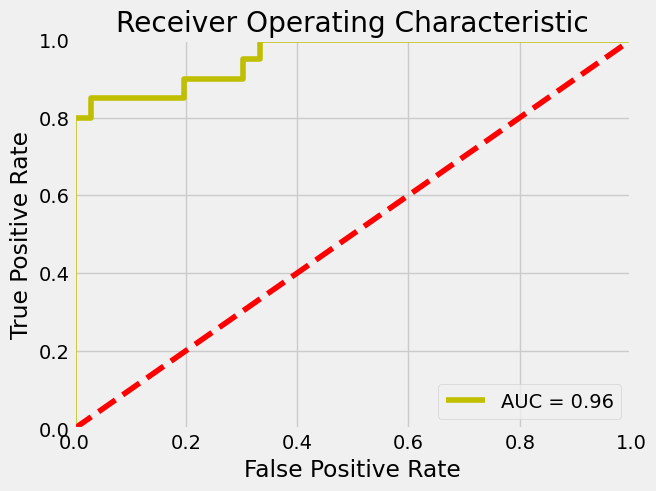

In [14]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

chinstrap_probs = p_hat[:,0]
fpr, tpr, thresholds = roc_curve(y_test, chinstrap_probs, 
                                 pos_label='Chinstrap') # will try 
                                                        # different 
                                                        # thresholds
roc_auc = auc(fpr, tpr) # AREA under the curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--') # Random classifier
plt.xlim([0, 1]), plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
def look_at_thresholds(adt, y_test, chinstrap_probs, 
                       pos_label='Chinstrap'): 
    '''
    Input: an approximately desired True Positive Rate
    Output: the corresponding threshold that gives the lowest 
            False Positive Rate (leftmost point on the ROC curve 
            at the given height) as well as pringting out some 
            information. 
    '''
    fpr, tpr, thresholds = roc_curve(y_test, chinstrap_probs, 
                                 pos_label='Chinstrap') # will try 
                                                        # different 
                                                        # thresholds
    dist = np.abs(tpr - adt)      
    best_indices = np.where(dist==dist.min())[0] # where returns 
                                                 # a tuple
    best_threshold = thresholds[best_indices[0]]
    print(f'Indices where TPR ~ {adt} are:', best_indices)
    print('FPRs at these thresholds are:', \
          np.round(fpr[best_indices],2))
    print('A reasonable choice for a threshold: %.3f\n'%best_threshold)
    return(best_threshold)

approx_desired_trp = 0.75 
_ = look_at_thresholds(approx_desired_trp, y_test, chinstrap_probs)

approx_desired_trp = 0.85
_ = look_at_thresholds(approx_desired_trp, y_test, chinstrap_probs)




Indices where TPR ~ 0.75 are: [2 3]
FPRs at these thresholds are: [0.   0.03]
A reasonable choice for a threshold: 0.451

Indices where TPR ~ 0.85 are: [4 5]
FPRs at these thresholds are: [0.03 0.2 ]
A reasonable choice for a threshold: 0.240



In [30]:
y_outcome = [outcome=='Chinstrap' for outcome in y_test]

str0 = 'the binary penguin NB classifier'
def test_threshold(th): 
    '''
    Input: threshold. 
    Output: just print corresponding F1 scores. 
    '''
    y_hat = [p[0]>=chosen_threshold for p in p_hat]
    f1s = skm.f1_score(y_outcome, y_hat, average=None)
    print('Threshold = %.3f'%th)
    print('F1 scores of '+str0+': %.2f and %.2f'%(f1s[0],f1s[1]))
    
    chosen_index = np.abs(thresholds - th).argmin()
    chosen_tpr, chosen_fpr = tpr[chosen_index], fpr[chosen_index]
    print('TPR = %.3f  ,  FPR = %.3f\n'%(chosen_tpr,chosen_fpr))
    

print('Higher TPR at the expense of some FPs')
print('    (and slightly lower F1 score):')    
chosen_threshold = 0.174
test_threshold(chosen_threshold)

print('Higher F1 score (and no FPs) at the expense of a lower TPR:')    
chosen_threshold = 0.667
test_threshold(chosen_threshold)




Higher TPR at the expense of some FPs
    (and slightly lower F1 score):
Threshold = 0.174
F1 scores of the binary penguin NB classifier: 0.96 and 0.87
TPR = 0.810  ,  FPR = 0.031

Higher F1 score (and no FPs) at the expense of a lower TPR:
Threshold = 0.667
F1 scores of the binary penguin NB classifier: 0.92 and 0.65
TPR = 0.048  ,  FPR = 0.000



|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50" height=""> | **In summary:** </br>  | 
* The choice of evaluation metrics would depend on the specifics and/or context of the problem. 
* Naively using accuracy when the model was trained on imbalanced data is misleading: it suggests the model performs better than it actually does.  
* For classifiers, the F1 score or the ROC curve are often standard measures of performance.


